## Graphical exploratory data analysis

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    #Remember, however, that the end value in np.arange() is not inclusive. 
    #Python range() vs numpy arange() [not arrange()]. They are the same when using integers 
    #(except for the return type), but numpy's version can use other variable types.
    # If you're using Python 3, though, note that range has changed and now returns an iterator instead
    #of a list. 

    return x, y

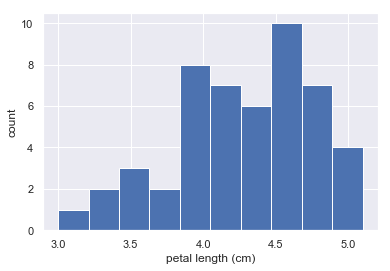

In [3]:
import numpy as np
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])
setosa_petal_length = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])
virginica_petal_length = np.array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

import matplotlib.pyplot as plt
import seaborn as sns
# Set default Seaborn style
sns.set()
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')

plt.show()


### Adjusting the number of bins in a histogram
* The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 


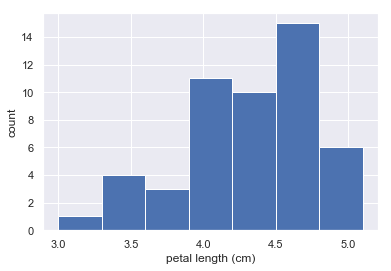

In [5]:
import numpy as np 

n_data = len(versicolor_petal_length)

n_bins= np.sqrt(n_data)

n_bins = int(n_bins)

_ = plt.hist(versicolor_petal_length,bins = n_bins)

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

plt.show()

### Plot all of your data: bee swarm plotting
The key disadvantage of histgram plot is the plots look different when different number of bins are set, so called binning bias. Also, we put values in bins and lost data values in histgram plot

In [ ]:
import pandas as pd

filePath = "C:/Users/ljyan/Desktop/courseNotes/dataScience/machineLearning/data/"
filename = "iris.csv"
file = filePath+filename
df = pd.read_csv(file, sep =  ',', header = None) 

print(df.head())

_ = sns.swarmplot(x='species', y='petal_length', data=df)

_ = plt.xlabel('species') 
_ = plt.ylabel('petal length (cm)')

plt.show()

### ECDF and box plot
If there are too many data, swarmplot can be very conjested. In this case, empirical cumulative distribution function plot, and also the related boxplot might be a better choice.  

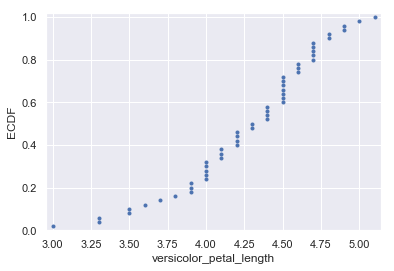

In [22]:
x_vers, y_vers = ecdf(versicolor_petal_length)

plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

plt.margins(0.02) 

plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')

plt.show()


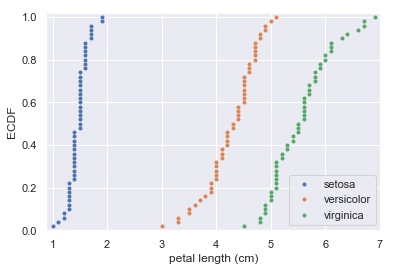

In [23]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none') 
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')
# using _ to plot three plots together.

plt.margins(0.02)

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


## Quantitative exploratory data analysis
Means and medians: mean can be strong deviated if some data is particularly too big or too small

In [24]:
import numpy as np
percentiles = np.array([2.5,25,50,75,97.5])

ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

print(ptiles_vers )

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

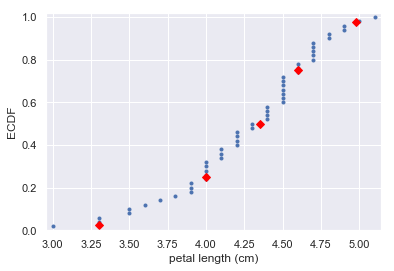

In [30]:
# Plot the ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker ='D', color ='red',
          linestyle = 'none')

plt.show()

### Box-and-whisker plot
When data is bigger, it is better to use Box plot. Iris data here is used just for demonstration. 

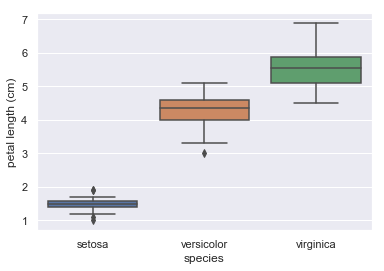

In [32]:
sns.boxplot(x = 'species', y= 'petal_length',data = df) 

plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()


### Compute variance and covariance

In [33]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = differences ** 2
variance_explicit = np.mean(diff_sq)

variance_np = np.var(versicolor_petal_length) #Note there is a funciton to directly calculate variance

std = np.std(versicolor_petal_length) 
print(variance_explicit,variance_np,std)


0.21640000000000004 0.21640000000000004 0.4651881339845203


In [9]:
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)
print(covariance_matrix)
petal_cov = covariance_matrix[0,1]

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [34]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat

r = pearson_r(versicolor_petal_length,versicolor_petal_width) #pearson is not person

print(r)

[[1.         0.78666809]
 [0.78666809 1.        ]]


## Thinking probabilistically-- Discrete variables

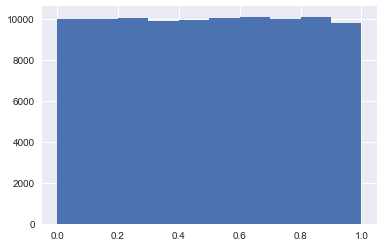

In [49]:
np.random.seed(42) 
random_numbers = np.empty(100000)  

for i in range(100000):
    random_numbers[i] = np.random.random()

_ = plt.hist(random_numbers)

plt.show()

### The np.random module and Bernoulli trials

In [38]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0

    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+= 1

    return n_success


### How many defaults might we expect?
* A bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. Now calculate the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. (For Bernoulli, the mean is np.) 

* Simulate with 100 Bernoulli trials. Here, a success is a default. The word "success" just means that the Bernoulli trial evaluates to True. 

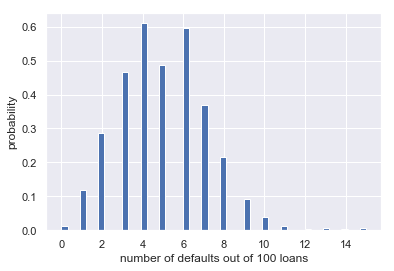

In [47]:
np.random.seed(42)

n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)
       

_ = plt.hist(n_defaults, density = 'normed',bins = 50) 
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()



### Will the bank fail?
* Use n_defaults to plot CDF or ecdf.

* If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?


Probability of losing money = 0.022


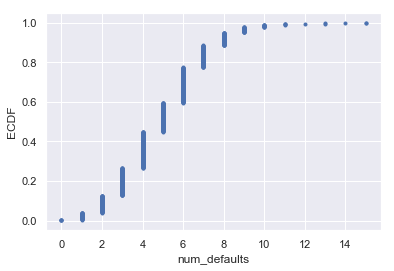

In [42]:
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes

plt.plot(x,y,marker = '.', linestyle = 'none')
plt.xlabel('num_defaults')
plt.ylabel('ECDF')

n_lose_money = sum(n_defaults >= 10) 

print('Probability of losing money =', n_lose_money / len(n_defaults))


### Sampling out of the Binomial distribution
* Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section but without simulating all of the Bernoulli trials as in previous exercise.  

* Instead, perform the sampling using np.random.binomial(). This is far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000.

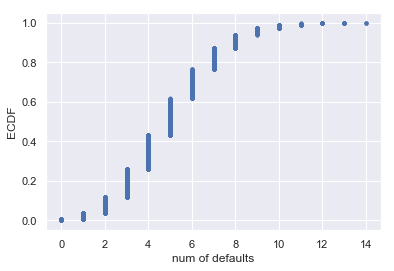

In [43]:
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

x,y = ecdf(n_defaults)

plt.plot(x,y,marker = '.', linestyle = 'none')
plt.xlabel('num of defaults')
plt.ylabel('ECDF')
plt.show()

### Plotting the Binomial PMF
* See the trick that centers the bars on each number. 

* **The shape of binomial PMF such as symmetry or asymmetry depends on the p value and n value. If n is huge, then it approaches normal for whatever p.** 

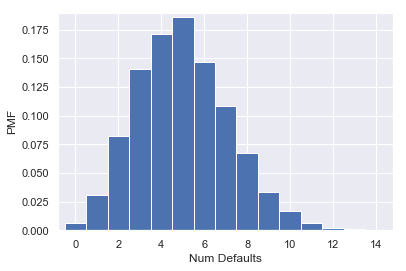

In [46]:
bins = np.arange(0, max(n_defaults)+1.5) - 0.5
plt.hist(n_defaults, density = 'normed',bins = bins)
plt.margins(0.02)
plt.xlabel("Num Defaults")
plt.ylabel("PMF") 

plt.show()

### Relationship between Binomial and Poisson distributions
* Poisson distribution is a limit of the Binomial distribution for rare events (p is small and n is big). See details on mathematical proof. 

* However, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

* As the results below show, when n is big and p is small, then binomial indeed approaches Poisson. 

In [48]:
#Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10
samples_poisson = np.random.poisson(10,10000)
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

n = [20,100,1000]
p = [0.5,0.1,0.01]

for i in range(3):
    samples_binomial = np.random.binomial(n = n[i], p = p[i], size = 10000)

    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9881 3.1578407797100856
n = 20 Binom: 10.0222 2.2492014494037655
n = 100 Binom: 10.0776 3.0122712759643675
n = 1000 Binom: 10.0481 3.1480130860592053


### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Answer: Both Binomial and Poisson, though Poisson is easier to model and compute.
Note Poisson is the limit case of binomial.

### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [53]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

[3 3 2 ... 1 3 3]
Probability of seven or more no-hitters: 0.0058


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable. This is actually a problem of hypothesis testing. Here we calculate p-value using discrete random variables. 

## Thinking probabilistically-- Continuous variables

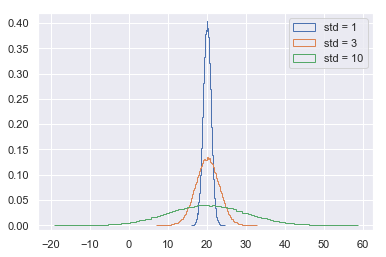

In [55]:
samples_std1 = np.random.normal(20,1, size = 100000)
samples_std3 = np.random.normal(20,3, size = 100000)
samples_std10 = np.random.normal(20,10, size = 100000)

plt.hist(samples_std1,density = 'normed', histtype = 'step', bins = 100)
plt.hist(samples_std3,density = 'normed', histtype = 'step', bins = 100)
plt.hist(samples_std10,density = 'normed', histtype = 'step', bins = 100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF

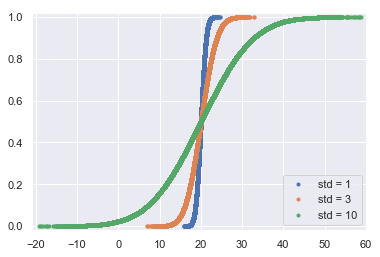

In [56]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

plt.plot(x_std1, y_std1,marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3,marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10,marker = '.', linestyle = 'none')


plt.margins(0.02)


_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. 

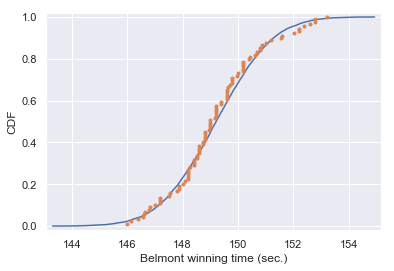

In [57]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])
mu = np.mean(belmont_no_outliers)
sigma= np.std(belmont_no_outliers)

samples = np.random.normal(mu,sigma,10000)

x_theor, y_theor = ecdf(samples)
x, y  = ecdf (belmont_no_outliers)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [59]:
mu = 149.22101123595507
sigma = 1.627816471774816
samples = np.random.normal(mu,sigma,1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = sum(samples < 144)/len(samples)
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000681


### Matching a story and a distribution
* How might we expect the time between Major League no-hitters to be distributed? Now, we are looking at the probability distribution of the time between no hitters.

Answer: exponential distribution.  
Note exposnential distribution is related to Poisson distribution. One is handling number events for a fixed time period, and the other is time between events.

* How many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? 

Answer:
Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

### Distribution of no-hitters and cycles
In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [60]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 =  np.random.exponential(tau2, size)

    return t1 + t2


Compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

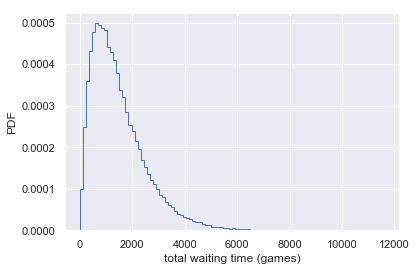

In [62]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, 100000)

_ = plt.hist(waiting_times, bins=100, histtype='step',
             density = 'normed')
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

plt.show()